# Exploring the transformation functions used in the code

March 26, 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

import subprocess as sp
import sys
import os
import glob

from scipy import fftpack

In [3]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

[NbConvertApp] WARNING | pattern 'modules_image_analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook outp

## Extract image data 

In [6]:
data_dir = '/global/project/projectdirs/dasrepo/vpa/cosmogan/data/raw_data/'
data_dir='/global/cfs/cdirs/m3363/vayyar/cosmogan_data/raw_data/'
fname='raw_train.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape


(17000, 128, 128)

In [5]:
fname='raw_val.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape

(2456, 128, 128)

## Transformation functions

### Pixel intensity histogram

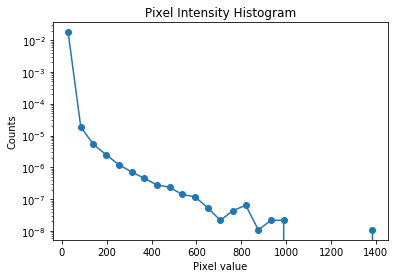

In [25]:
hist=f_pixel_intensity(samples[:100])

/global/homes/v/vpa/.conda/envs/v_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5, 1.0, 'Inv-transform')

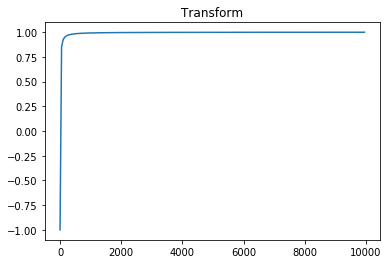

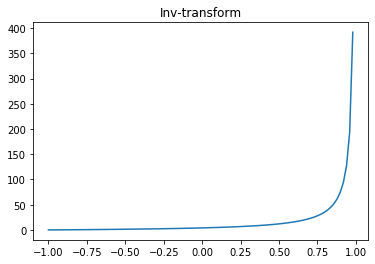

In [45]:
### Transformation functions for image pixel values
def f_transform(x):
    return 2.*x/(x + 4.) - 1.

def f_invtransform(s):
    return 4.*(1. + s)/(1. - s)

## Transform
plt.figure()
x=np.arange(0,1e4,50)
arr=f_transform(x)
plt.plot(x,arr)
plt.title('Transform')

## Inverse transform
x=np.linspace(-1,1,num=100)
# arr_t=f_transform(x)
arr_inv=f_invtransform(x)

plt.figure()
plt.plot(x,arr_inv)
plt.title('Inv-transform')


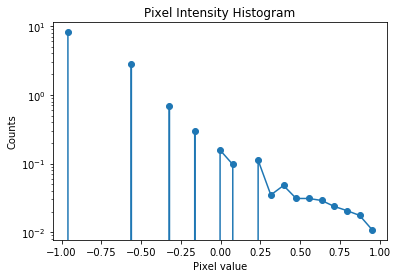

In [29]:
###pixel intensities after transformation
arr1=f_transform(samples[:100])
hist=f_pixel_intensity(arr1))

###pixel intensities after inverse transformation
arr1=f_transform(samples[:100])
hist=f_pixel_intensity(arr1))


nan

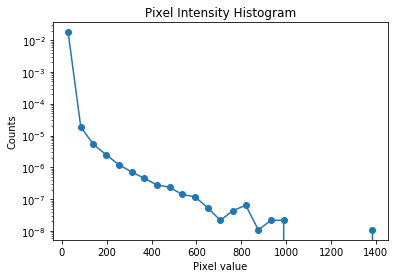

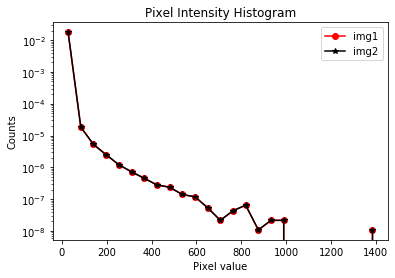

In [47]:
### Comparing array with f_invtransform(f_transform)
f_pixel_intensity(samples[:100])
arr=f_invtransform(f_transform(samples[:100]))
f_compare_pixel_intensity(samples[:100],arr)

## Spectrum

(100, 128, 128) (100, 128, 128) (100, 88) (100, 88)
(88,) (88,)


3.65783741856361e-22

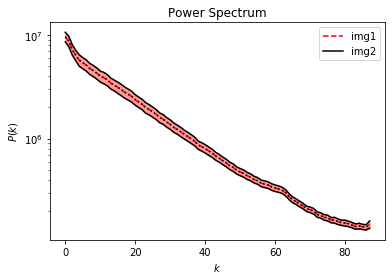

In [48]:
arr=f_invtransform(f_transform(samples[:100]))
f_compare_spectrum(samples[:100],arr)